In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import time
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import model_selection, svm , naive_bayes
from sklearn.naive_bayes import ComplementNB , BernoulliNB,GaussianNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score,balanced_accuracy_score,average_precision_score,f1_score,recall_score,classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
import pickle

# Linear SVM model

In [3]:
train=pd.read_csv('DataSet.csv', encoding='utf-8')

# Split the dataset
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(train["text"].values.astype('str'),train["target"],random_state=1,test_size=0.20)

# Feature extraction
vectorizer = TfidfVectorizer(max_features=1000,decode_error="ignore")
Train_X= vectorizer.fit_transform(Train_X)
Test_X = vectorizer.transform(Test_X)

# Linear SVM Classifier
clf=svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')

start = time.time()
# fit the training dataset on the classifier
clf.fit(Train_X, Train_Y)

end = time.time()
#Print the elapsed time for training the model
print("The elapsed time ", end - start)

# predict the labels on test dataset
clf_predictions=clf.predict(Test_X)

# Use accuracy_score function to get the accuracy
print("f1 Score -> ",f1_score(Test_Y,clf_predictions)*100)
print("recall Score -> ",recall_score(Test_Y,clf_predictions)*100)
print("balanced Accuracy Score -> ",balanced_accuracy_score(Test_Y,clf_predictions)*100)
print("precision Score -> ",average_precision_score(Test_Y,clf_predictions)*100)
print("Accuracy Score -> ",accuracy_score(Test_Y,clf_predictions)*100)
print("MSE Score -> ",np.square(np.subtract(Test_Y,clf_predictions)).mean())

The elapsed time  0.003997325897216797
f1 Score ->  79.88505747126437
recall Score ->  80.34682080924856
balanced Accuracy Score ->  80.84698553415795
precision Score ->  73.10794944339908
Accuracy Score ->  80.87431693989072
MSE Score ->  0.1912568306010929


C:\Users\96654\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[168  25]
 [ 24 149]]


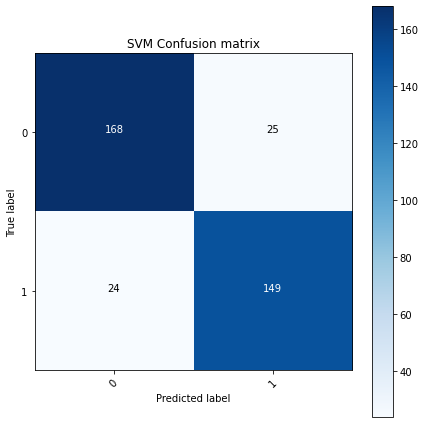

In [11]:
from sklearn.metrics import confusion_matrix
import itertools    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Test_Y,clf_predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='SVM Confusion matrix')

plt.show()

In [12]:
import seaborn as sns

def plot_cm(y_true, y_pred, title, figsize=(7,7)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

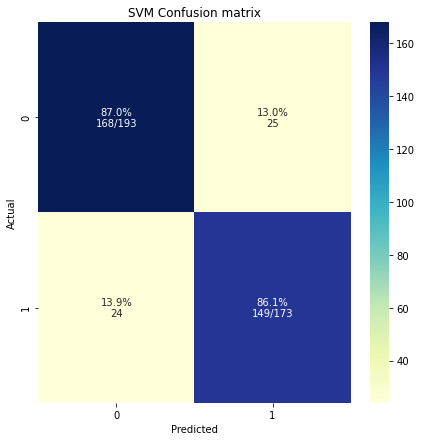

In [13]:
from sklearn.metrics import confusion_matrix
plot_cm(Test_Y,clf_predictions, 'SVM Confusion matrix', figsize=(7,7))

In [14]:
filename = 'secendSVM_model.pkl'
pickle.dump(clf, open(filename, 'wb'))


with open(filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [9]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_LR_Model.score(Test_X, Test_Y)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(Test_X)  

Ypredict

Test score: 87.17 %


array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [15]:
sample_sub=pd.read_csv('finalUnlabelled.csv', encoding='utf-8')
Final = vectorizer.transform(sample_sub['text'])

y_pre=Pickled_LR_Model.predict(Final)
sub=pd.DataFrame({'text':sample_sub['text'].values.tolist(),'target':y_pre})
sub.to_csv('SVMresults.csv',index=False)